In [1]:
import numpy as np
import pandas as pd

# import loan-test data and loan-train.

In [23]:
df = pd.read_csv("E:/loan-test.csv")
df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [3]:
len(df)

367

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [22]:

df1 = pd.read_csv("E:/loan-train.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# data gathering

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df1.shape

(614, 13)

In [12]:
df.shape

(367, 12)

In [13]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Preprocessing 

In [14]:
def explore_obj_type(df2,feathure_name):
    if df[feathure_name].dtype == 'object':
        print(df2[feathure_name].value_counts())

In [15]:
df1 = explore_obj_type(df1,'Gender')
df1

Male      489
Female    112
Name: Gender, dtype: int64


In [16]:
import matplotlib.pyplot as plt


 missing  no in data sets

In [17]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
df1['Credit_History'].fillna(df1['Credit_History'],inplace = True)
df['Credit_History'].fillna(df['Credit_History'],inplace = True)

In [27]:
df1.fillna(df1['Credit_History'].mode(),inplace = True)
df.fillna(df['Credit_History'].mode(),inplace = True)


In [28]:
df1.fillna(df1['LoanAmount'].mean(),inplace = True)
df.fillna(df['LoanAmount'].mean(),inplace = True)

In [29]:
df1.fillna(df1['Married'],inplace = True)

df.fillna(df['Married'],inplace = True)

In [39]:
df1['Married'] = df1['Married'].replace({'Yes': 1,'No': 0})



In [41]:
df['Married'] = df['Married'].replace({'Yes': 1,'No': 0})
 

In [35]:
df1['Education'] = df1['Education'].replace({"Graduate":1 ,"Not Graduate":0})
 

In [37]:
df['Education'] = df['Education'].replace({"Graduate":1 ,"Not Graduate":0})



In [42]:
df1['Gender'] =  df1['Gender'].replace({"Male":0 ,"Female":1})
 

In [43]:
df['Gender'] =  df['Gender'].replace({"Male":0 ,"Female":1})
 

In [44]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [45]:
df1.Loan_Status = df1.Loan_Status.replace({"Y":1,"N":0})

In [51]:
df1.Self_Employed = df1.Self_Employed.replace({"No":0,"Yes":1})

df.Self_Employed = df.Self_Employed.replace({"No":0,"Yes":1})


In [54]:
df1.fillna(df1['Dependents'].mode()[0],inplace =True)
df.fillna(df['Dependents'].mode()[0],inplace =True)

# Test data

In [62]:

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.000000,2
1,LP001022,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,0.0,1,2,1,0.0,2340,2546,100.0,360.0,136.132597,2
4,LP001051,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0.0,1,3+,0,1.0,4009,1777,113.0,360.0,1.000000,2
363,LP002975,0.0,1,0,1,0.0,4158,709,115.0,360.0,1.000000,2
364,LP002980,0.0,0,0,1,0.0,3250,1993,126.0,360.0,136.132597,1
365,LP002986,0.0,1,0,1,0.0,5000,2393,158.0,360.0,1.000000,0


# Train Data

In [61]:
df1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0.0,1.0,3+,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
feather_col = ['Property_Area']
feather_col

['Property_Area']

In [58]:
for i in feather_col:
    df1[i] = le.fit_transform(df1[i])
    df[i]  = le.fit_transform(df[i])


In [59]:
df1.Property_Area

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int32

In [60]:
df.Property_Area

0      2
1      2
2      2
3      2
4      2
      ..
362    2
363    2
364    1
365    0
366    0
Name: Property_Area, Length: 367, dtype: int32

# Visualization

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
import seaborn as sns

<AxesSubplot:>

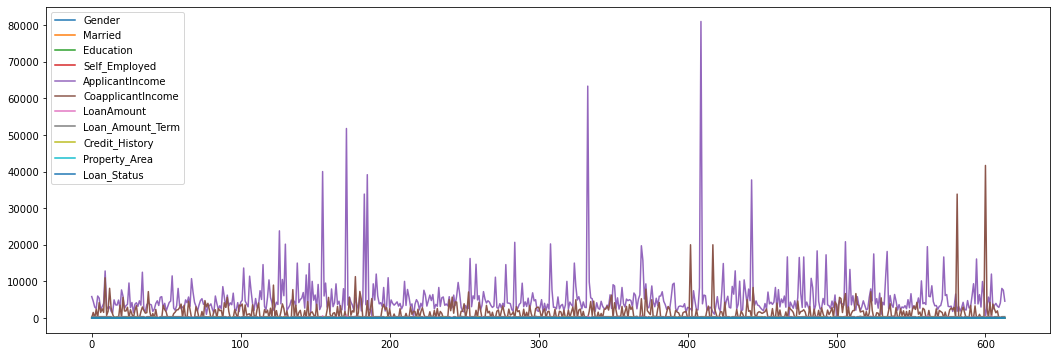

In [65]:
df1.plot(figsize= (18,6))

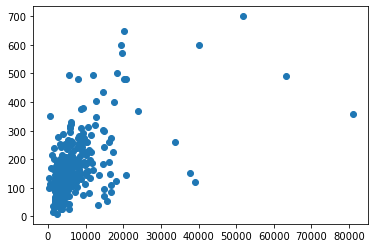

In [66]:
plt.plot(figsize = (30,10))
plt.scatter(df1['ApplicantIncome'],df1['LoanAmount'])

<AxesSubplot:>

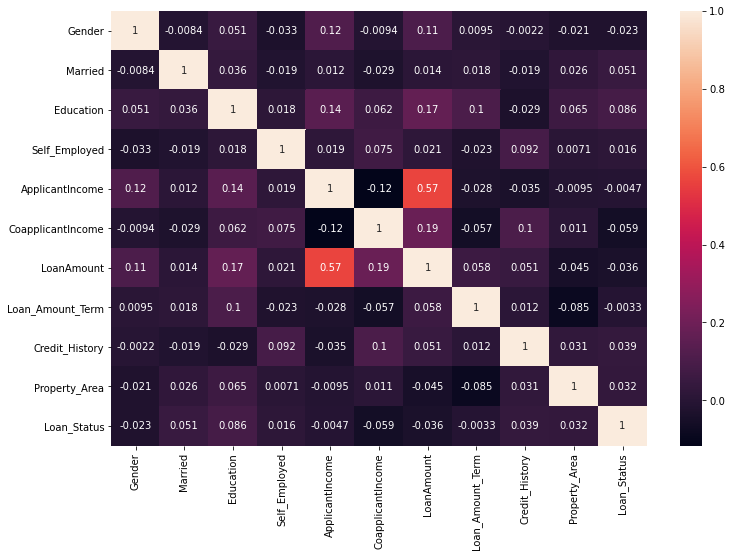

In [67]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.corr(),annot=True)

# decision tree  

In [68]:
from sklearn.tree  import DecisionTreeClassifier

# feather

In [69]:
feather = ['Credit_History','Self_Employed','ApplicantIncome']

In [70]:
x_train = df1[feather].values
y_train = df1['Loan_Status'].values

In [71]:
x_test= df[feather]
x_test

,Credit_History,Self_Employed,ApplicantIncome
0,1.000000,0.0,5720
1,1.000000,0.0,3076
2,1.000000,0.0,5000
3,136.132597,0.0,2340
4,1.000000,0.0,3276
...,...,...,...
362,1.000000,1.0,4009
363,1.000000,0.0,4158
364,136.132597,0.0,3250
365,1.000000,0.0,5000


In [72]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [73]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
predicted =  dt.predict(x_train)
predicted

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [75]:
dt.predict(x_test) 

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [77]:
dt.score(x_train,y_train)
print(dt.score(x_train,y_train)* 100)

97.55700325732899


In [80]:
df['Elegible for loan']  = dt.predict(x_test)
df['Elegible for loan']


0      0
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    0
365    1
366    1
Name: Elegible for loan, Length: 367, dtype: int64

In [81]:
dt.score(x_test,df['Elegible for loan'])

1.0

In [82]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Elegible for loan
0,LP001015,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.000000,2,0
1,LP001022,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.000000,2,1
2,LP001031,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.000000,2,1
3,LP001035,0.0,1,2,1,0.0,2340,2546,100.0,360.0,136.132597,2,1
4,LP001051,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0.0,1,3+,0,1.0,4009,1777,113.0,360.0,1.000000,2,1
363,LP002975,0.0,1,0,1,0.0,4158,709,115.0,360.0,1.000000,2,1
364,LP002980,0.0,0,0,1,0.0,3250,1993,126.0,360.0,136.132597,1,0
365,LP002986,0.0,1,0,1,0.0,5000,2393,158.0,360.0,1.000000,0,1


# Accuracy of logistic regression 

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr  = LogisticRegression()

In [85]:
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
model = lr.score(x_train,y_train)
model

0.6872964169381107

In [87]:
print(model*100)

68.72964169381108


# Accuracy of KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn

KNeighborsClassifier()

In [90]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
knn.score(x_train,y_train)

0.749185667752443

In [92]:
print(knn.score(x_train,y_train)*100)

74.9185667752443


In [93]:
knn.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 